In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data files
speedtest_data is provided by Ookla from https://www.speedtest.net/insights/blog/tracking-covid-19-impact-global-internet-performance/
The Human Development Index file can be found from the UN Human Development Index site at http://hdr.undp.org/en/data

In [2]:
speedtest_data = '2020-05-27 Ookla Speedtest Tracking COVID-19’s Impact on Global Internet Performance Article Data.xlsx'
hdi_data = 'Human development index (HDI).csv'

In [3]:
df_speedtest = pd.read_excel(speedtest_data, skiprows=range(2))
df_hdi = pd.read_csv(hdi_data, skiprows=range(1))

In [4]:
speedtest_by_country = df_speedtest.groupby('Place')[['Mobile Download % Change vs Base Week', 'Fixed Download % Change vs Base Week', 'Fixed Median Download Mbps']].min()
speedtest_by_country = speedtest_by_country.reset_index()

# Clean the data
First we melt the dataframe to have the years in a single column.  We will then only filter down to the HDI data for the year 2018

In [7]:
df_hdi_melted = pd.melt(df_hdi, id_vars=['HDI Rank (2018)', 'Country'], var_name='Year', value_name='HDI')
df_hdi_latest = df_hdi_melted[df_hdi_melted['Year'] == '2018']

# Merge the two dataframes on the Place=Country keys

In [9]:
df = pd.merge(left=speedtest_by_country, right=df_hdi_latest, left_on='Place', right_on='Country')
df['HDI'] = pd.to_numeric(df['HDI'],errors='coerce')

# Plot Mobile Download % Change vs Base Week

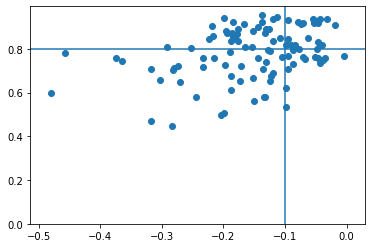

In [11]:
x = df['Mobile Download % Change vs Base Week']
y = df['HDI']
plt.scatter(x,y)
plt.yticks(np.arange(0,1,step=0.2))
plt.axhline(y=0.8)
plt.axvline(x=-0.10)
plt.show()

# Plot Fixed Download % Change vs Base Week

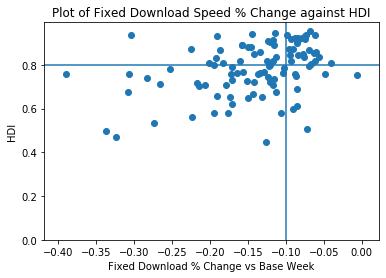

In [20]:
x = df['Fixed Download % Change vs Base Week']
y = df['HDI']
plt.scatter(x,y)
plt.yticks(np.arange(0,1,step=0.2))
plt.axhline(y=0.8)
plt.axvline(x=-0.1)

plt.title('Plot of Fixed Download Speed % Change against HDI')
plt.xlabel('Fixed Download % Change vs Base Week')
plt.ylabel('HDI')
plt.show()

In [21]:
Q1 = df[(df['Fixed Download % Change vs Base Week'] >= -0.1) & (df['HDI'] >= 0.8)]
Q2 = df[(df['Fixed Download % Change vs Base Week'] >= -0.1) & (df['HDI'] < 0.8)]
Q3 = df[(df['Fixed Download % Change vs Base Week'] < -0.1) & (df['HDI'] >= 0.8)]
Q4 = df[(df['Fixed Download % Change vs Base Week'] < -0.1) & (df['HDI'] < 0.8)]

In [22]:
print(len(Q1))
print(len(Q2))
print(len(Q3))
print(len(Q4))
print(len(df))

27
9
23
44
103


# Plot Fixed Median Download vs Base Week

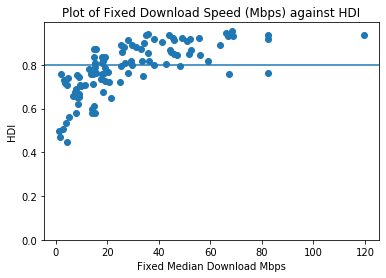

In [19]:
x = df['Fixed Median Download Mbps']
y = df['HDI']
plt.scatter(x,y)
plt.yticks(np.arange(0,1,step=0.2))
plt.axhline(y=0.8)

plt.title('Plot of Fixed Download Speed (Mbps) against HDI')
plt.xlabel('Fixed Median Download Mbps')
plt.ylabel('HDI')
plt.show()